In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
Vb = 3.3
Vref =  2.5
nIDs = 9 # Split the range into this number of IDs
Rbias = 22000

In [21]:
Vtargets = np.linspace(0,Vref,nIDs) #Split the range evenly.
print np.linspace(0, 1.0, nIDs) #Split the range evenly.
Vtargets[0] = 0.01         # Fix the first and last Vtarget to not get divide by zero.
Vtargets[-1] = Vref-0.01
print Vtargets

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]
[ 0.01    0.3125  0.625   0.9375  1.25    1.5625  1.875   2.1875  2.49  ]


Calculate the Rid for all target voltages with simple voltage dividing.

Vo = Vi * R /(Rbias + R) => R = Rbias / (Vi/Vo - 1)

In [22]:
Rids = [Rbias / (Vb/Vx - 1) for Vx in Vtargets]
IDs = range(len(Vtargets))
IDst = zip(IDs, Rids)



# These are the values of the Rids:
("ID number", "R in ohm")

In [23]:
print IDst

[(0, 66.869300911854097), (1, 2301.2552301255232), (2, 5140.1869158878517), (3, 8730.1587301587297), (4, 13414.634146341466), (5, 19784.172661870503), (6, 28947.36842105263), (7, 43258.426966292143), (8, 67629.629629629664)]


Calculate and verify good mergins. 

In [24]:
tolerance = Vref * 0.05
print "Tolerance is +- " + str(tolerance) + " V"
vid = [Vb * r / (Rbias + r) for r in Rids]
vidn = [(Vb * r / (Rbias + r))-tolerance for r in Rids]
vidp = [(Vb * r / (Rbias + r))+tolerance for r in Rids]

Tolerance is +- 0.125 V


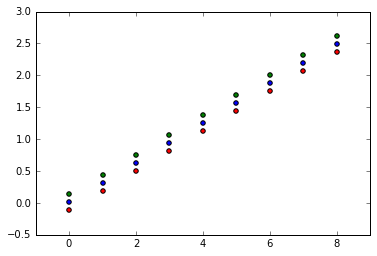

In [25]:
plt.scatter(IDs, vid, c='b')
plt.scatter(IDs, vidn, c='r')
plt.scatter(IDs, vidp, c='g')

In [26]:
print vidp
print vidn

[0.13500000000000001, 0.4375, 0.75000000000000011, 1.0625, 1.3750000000000002, 1.6875, 2.0, 2.3125, 2.6150000000000002]
[-0.115, 0.1875, 0.50000000000000011, 0.81249999999999989, 1.1250000000000002, 1.4375, 1.75, 2.0625, 2.3650000000000002]


In [27]:
# Make sure that all no ID is overlapping with the given tolerance
for i in range(len(vid)-1):
    print vidn[i+1] - vidp[i]


0.0525
0.0625
0.0625
0.0625
0.0625
0.0625
0.0625
0.0525
